In [2]:
import numpy as np
import csv
import scipy
import scipy.io.wavfile
import matplotlib.pyplot as plt
from scipy.io import wavfile
import os
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, ParameterGrid
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn import linear_model
from sklearn.metrics import confusion_matrix, matthews_corrcoef
logistic_cl = linear_model.LogisticRegression()
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import warnings
warnings.warn("deprecated", DeprecationWarning)

C:\Users\Admin\AppData\Local\Temp\ipykernel_11256\1170440235.py:23: DeprecationWarning: deprecated
  warnings.warn("deprecated", DeprecationWarning)


In [4]:


def custom_database_import(in_path):
    # Lấy danh sách các tệp âm thanh trong thư mục đầu vào có đuôi .wav
    index_list = [f for f in os.listdir(in_path) if f.endswith('.wav')]
    
    # Khởi tạo danh sách để chứa các tệp âm thanh và nhãn tương ứng
    in_all_audios = []
    in_y = []
    
    # Duyệt qua danh sách các tệp âm thanh
    for filename in index_list:
#         print(filename)
        # Xây dựng đường dẫn đầy đủ đến tệp âm thanh hiện tại
        full_path = os.path.join(in_path, filename)
        
        # Đọc tệp âm thanh hiện tại và thêm vào danh sách
        rate, data = scipy.io.wavfile.read(full_path, mmap=False)
        in_all_audios.append((rate, data))
        
        # Trích xuất nhãn từ tên tệp và thêm vào danh sách
#         label = filename.split("_")[0] 
        name_parts = filename.split("_")  # tách chuỗi theo dấu gạch dưới
        label = name_parts[0]
#         print('label')
        in_y.append(label)
    
    # Chuyển danh sách nhãn thành một mảng numpy
    out_y = np.array(in_y)
    
    # Trả về danh sách các tệp âm thanh và mảng numpy chứa các nhãn tương ứng
    return in_all_audios, out_y

def custom_eval_database_import(in_path):
    index_list = os.listdir(in_path)
    in_all_audios = []

#     index_list = sorted(index_list, key=lambda x: int(x[:-4]))

    for filename in index_list:
        filename = in_path + f"{filename}"
        in_all_audios.append(scipy.io.wavfile.read(filename, mmap=False))

    return in_all_audios



def custom_csv_print(in_labels, filename):
    list_to_print = []
    for index in range(0, len(in_labels)):
        row_to_print = []
        row_to_print.append(index)
        row_to_print.append(in_labels[index])
        list_to_print.append(row_to_print)

    with open(filename, 'w', newline='', encoding='utf-8') as f:
        writer = csv.writer(f)
        writer.writerow(['Id', 'Predicted'])
        for index in range(0, len(list_to_print)):
            writer.writerow(list_to_print[index])
    return

def custom_preprocess(in_all_audios):
    frequency_preprocessed = []
    all_normalized_audios = []
    all_samples_processed = []

    # Normalization
    for i in range(0, len(in_all_audios)):
        single_normalized_audio = in_all_audios[i][1] / np.max(np.abs(in_all_audios[i][1]))
        all_normalized_audios.append(single_normalized_audio)

    # Frequency Domain
    for i in range(0, len(all_normalized_audios)):
        freq = np.abs(np.fft.fft(all_normalized_audios[i]))
        frequency_preprocessed.append(freq[:freq.shape[0]//2])


    # Sampling
    in_flag = 1024
    for i in range(0, len(frequency_preprocessed)):
        single_sample_processed = []
        if in_flag == 1024:
            arr_len = len(frequency_preprocessed[i])
            for j in range(in_flag):
                start = j * arr_len // in_flag
                end = (j + 1) * arr_len // in_flag
                single_sample_processed.append(np.mean(frequency_preprocessed[i][start:end]))
        all_samples_processed.append(single_sample_processed)
    return all_samples_processed


In [5]:
all_test_audios, y = custom_database_import("D:\Work\CTU\CT252 - Nien luan co so nganh\Gender-classification\wav")
# dulieu cua file audio
X = np.array(custom_preprocess(all_test_audios))

In [6]:
import warnings
warnings.filterwarnings('ignore')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print('X_train.shape')
print(X_train.shape)
print('X_test.shape')
print(X_test.shape)
print(X)
print(y)
print(y.shape)
print(X.shape)
hyp_parameters = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance']
}
config_cnt = 0
tot_config = 3 * 2 * 2
max_f1 = 0

for config in ParameterGrid(hyp_parameters):
    config_cnt += 1
    print(f'Analizing config {config_cnt} of {tot_config} || Config: {config}')
    config = {'n_neighbors': 3, 'weights': 'uniform'}
    knn_clf = KNeighborsClassifier(**config)
    knn_clf.fit(X_train, y_train)
    y_test_pred = knn_clf.predict(X_test)
    acc = accuracy_score(y_test_pred, y_test)
    p1, r1, f11, s1 = precision_recall_fscore_support(y_test, y_test_pred)
    macro_f1 = f11.mean()

if macro_f1 > max_f1:
    max_f1 = macro_f1
    print(f"-----> Score: {macro_f1}")
    print()


X_train.shape
(2932, 1024)
X_test.shape
(734, 1024)
[[7.92209994e+00 1.03279384e+01 1.31206928e+01 ... 5.02408077e-03
  5.11424259e-03 5.34203030e-03]
 [1.31294944e+01 1.00908522e+01 1.26168736e+01 ... 1.87232362e-02
  1.92958141e-02 1.86292953e-02]
 [5.36538529e+00 6.52895489e+00 9.88153729e+00 ... 4.88165358e-03
  5.16115370e-03 5.03686841e-03]
 ...
 [2.04837301e-01 5.90055950e-02 2.69959910e-01 ... 1.57372604e-01
  8.57712227e-02 7.48841158e-02]
 [1.41612767e-01 3.87296178e-01 2.23090915e-01 ... 5.09768161e-02
  7.61997453e-02 1.65224313e-01]
 [1.42678121e-01 3.59938294e-01 2.97869175e-01 ... 1.97275147e-01
  1.76688416e-01 9.68471747e-02]]
['Female' 'Female' 'Female' ... 'Male' 'Male' 'Male']
(3666,)
(3666, 1024)
Analizing config 1 of 12 || Config: {'n_neighbors': 3, 'weights': 'uniform'}
Analizing config 2 of 12 || Config: {'n_neighbors': 3, 'weights': 'distance'}
Analizing config 3 of 12 || Config: {'n_neighbors': 5, 'weights': 'uniform'}
Analizing config 4 of 12 || Config: {'n_n

(3666, 1024)
Kết quả KNN_clf tập Test = 


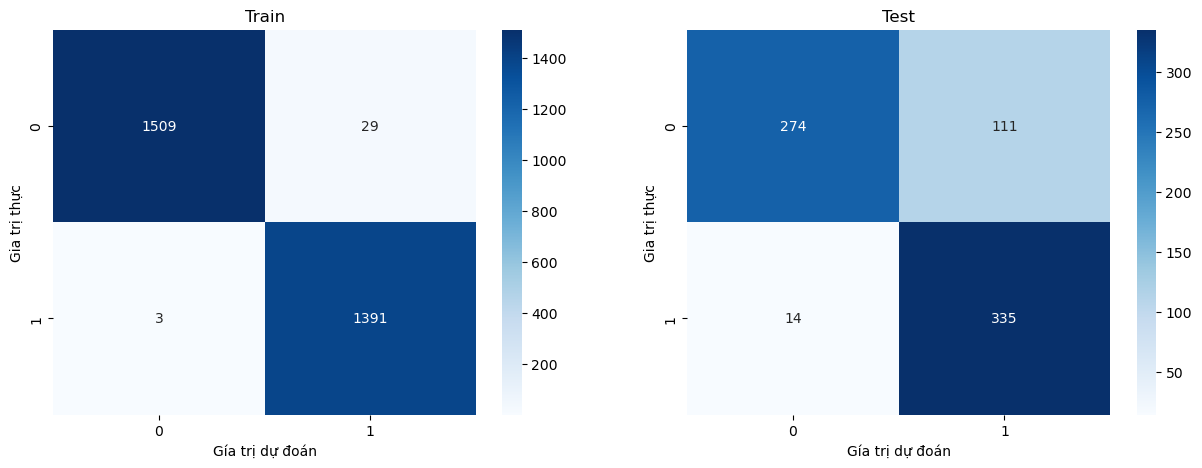

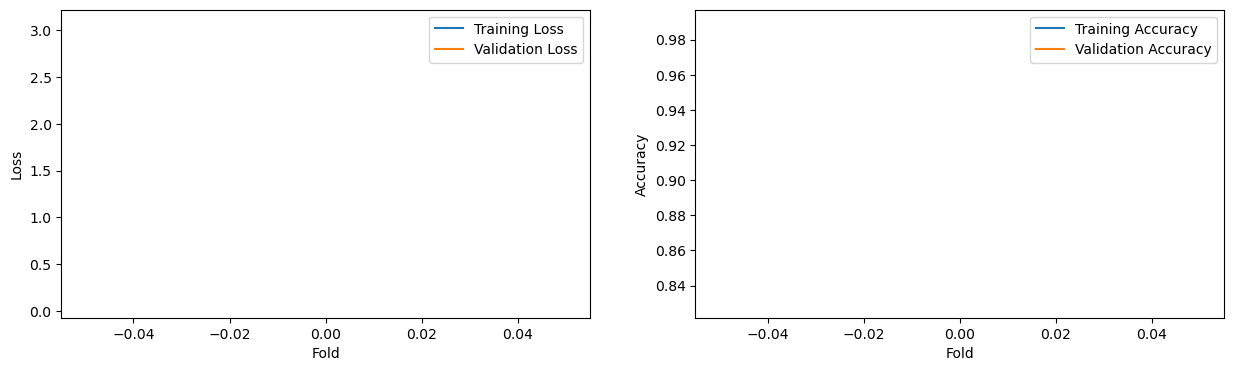

Kết quả KNN_clf tập Test = 


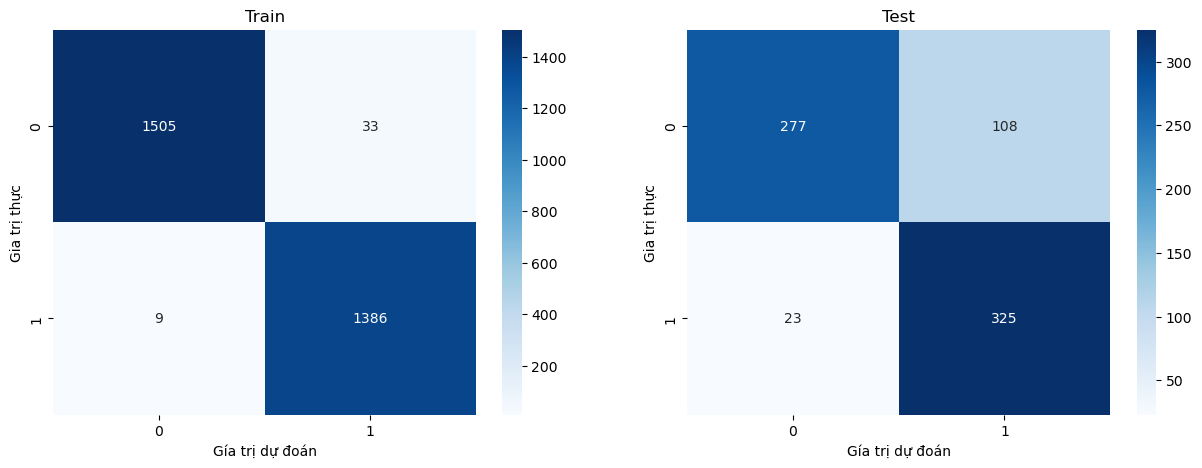

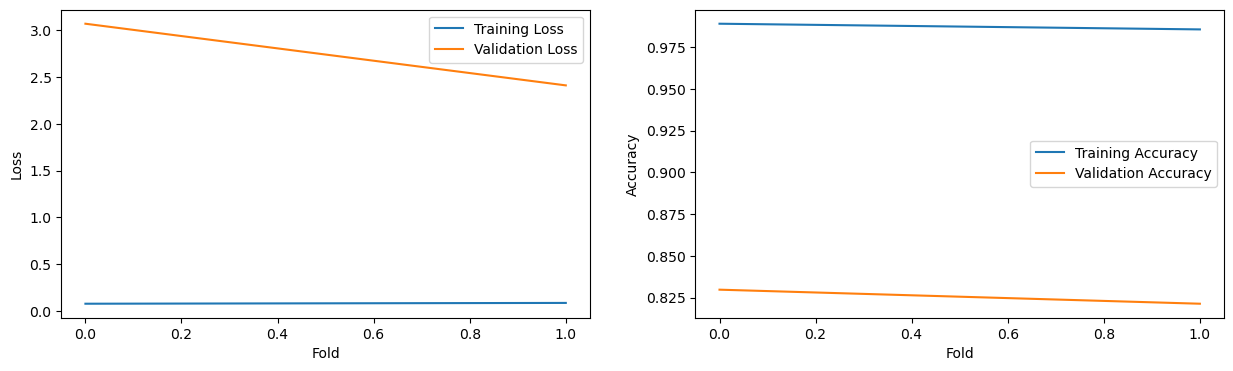

Kết quả KNN_clf tập Test = 


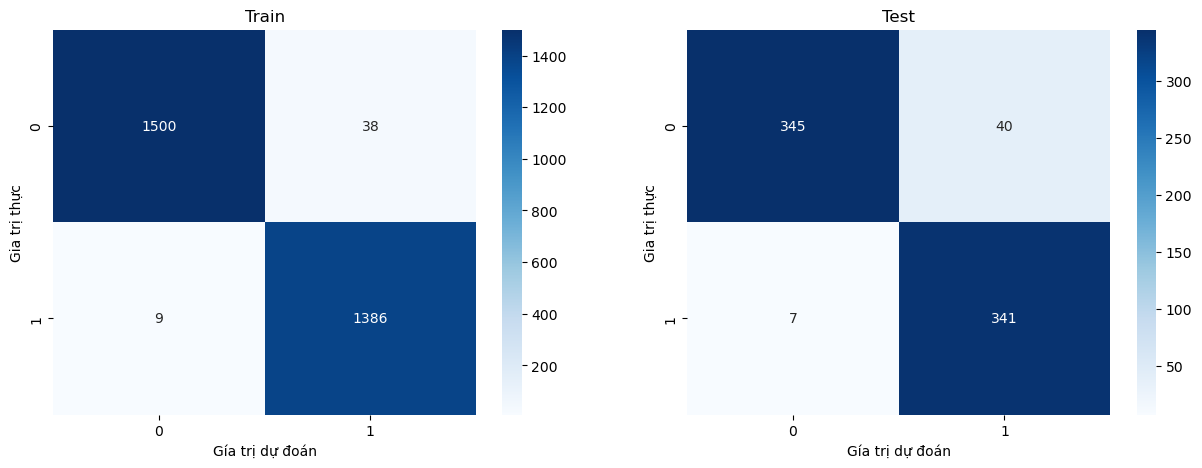

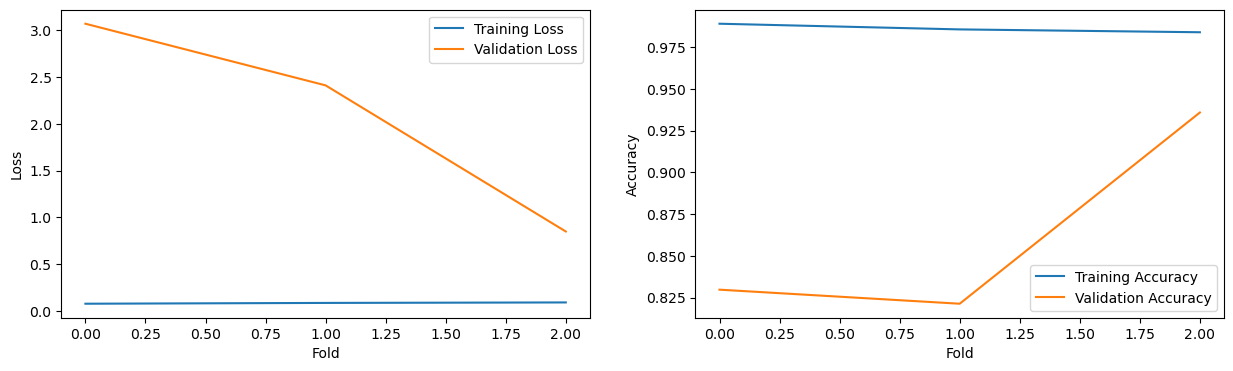

Kết quả KNN_clf tập Test = 


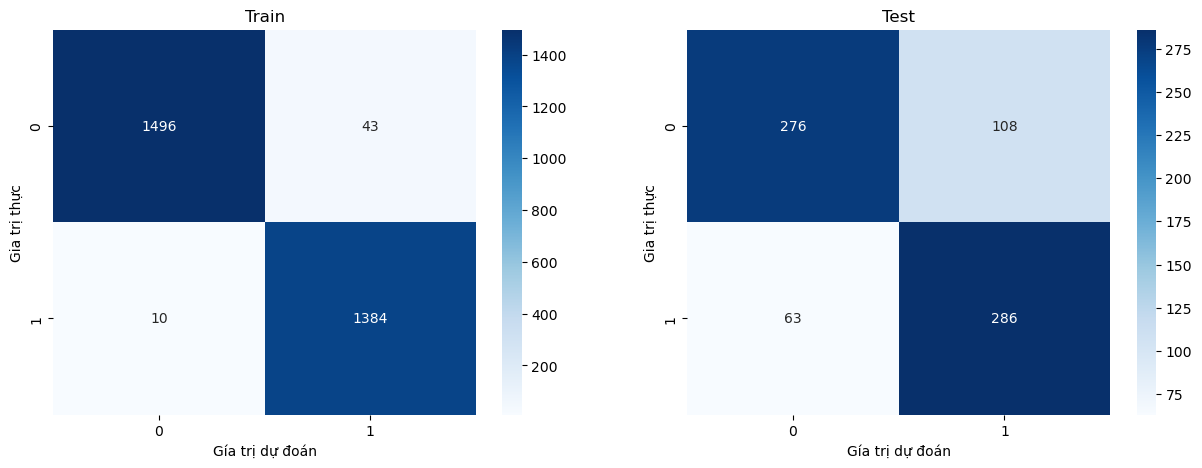

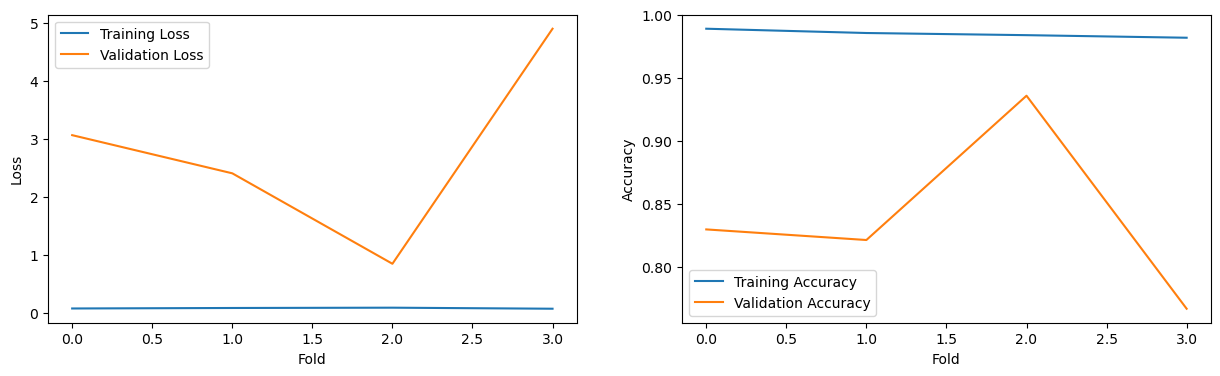

Kết quả KNN_clf tập Test = 


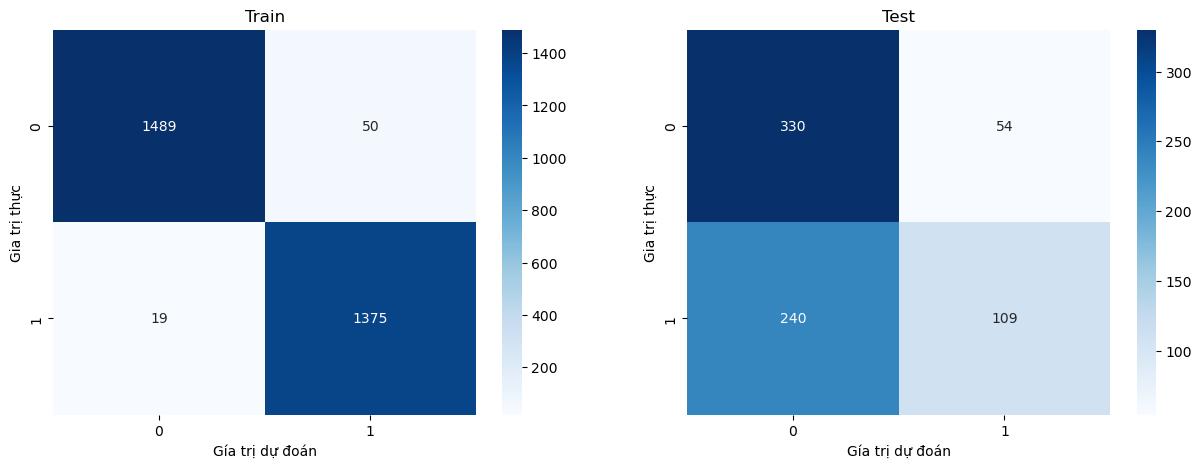

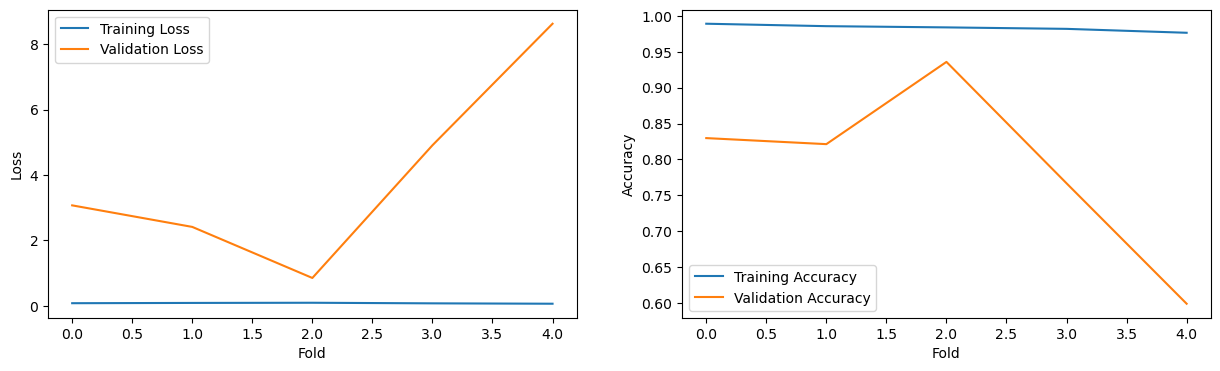

In [7]:
import seaborn as sns
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt

# initialize lists to store loss and accuracy values for each fold
train_loss = []
train_acc = []
test_loss = []
test_acc = []
loss = []

skf = StratifiedKFold(n_splits=5)
skf.get_n_splits(X,y)

print(X.shape)
i=1
file_name = 'KQ_KNN_1024_OK.txt'
f_log = open(file_name,"w",encoding="utf-8")

for train_index, test_index in skf.split(X,y):
    X_train, X_test = X[train_index], X[test_index]
    y_train,y_test = y[train_index], y[test_index]

    knn_clf.fit(X_train, y_train)

    print('Lần lặp' + str(i), file=f_log)

    y_train_pred = knn_clf.predict(X_train)
    print('Kết quả trên tập huấn luyện bằng = ', file=f_log)
    print(classification_report(y_train, y_train_pred, digits=5), file=f_log) 

    print('Kết quả KNN_clf tập Test = ')
    y_test_pred = knn_clf.predict(X_test)
    # calculate loss and accuracy for each iteration/fold
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))
    
    # tính độ lỗi và lưu vào mảng loss
    from sklearn.metrics import log_loss
    train_loss.append(log_loss(y_train, knn_clf.predict_proba(X_train)))
    test_loss.append(log_loss(y_test, knn_clf.predict_proba(X_test)))
    loss.append(test_loss[-1])
    print(classification_report(y_test, y_test_pred, digits=5), file=f_log)  
    
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

    # Biểu đồ cho tập huấn luyện
    cm_train = confusion_matrix(y_train, y_train_pred)
    sns.heatmap(cm_train, annot=True, cmap='Blues', fmt='g', ax=axs[0])
    axs[0].set_title('Train')
    axs[0].set_ylabel('Gia trị thực')
    axs[0].set_xlabel('Gía trị dự đoán')

    # Biểu đồ cho tập test
    cm_test = confusion_matrix(y_test, y_test_pred)
    sns.heatmap(cm_test, annot=True, cmap='Blues', fmt='g', ax=axs[1])
    axs[1].set_title('Test')
    axs[1].set_ylabel('Gia trị thực')
    axs[1].set_xlabel('Gía trị dự đoán')
    
    
    fig, axs = plt.subplots(1, 2, figsize=(15,4))
    axs[0].plot(train_loss, label='Training Loss')
    axs[0].plot(test_loss, label='Validation Loss')
    axs[0].legend()
    axs[0].set_xlabel('Fold')
    axs[0].set_ylabel('Loss')

    axs[1].plot(train_acc, label='Training Accuracy')
    axs[1].plot(test_acc, label='Validation Accuracy')
    axs[1].legend()
    axs[1].set_xlabel('Fold')
    axs[1].set_ylabel('Accuracy')

    plt.savefig('loss_accuracy.png')

    plt.show()

f_log.close()


In [8]:

# tính độ chính xác trên tập huấn luyện và tập kiểm tra từ đoạn code
train_acc = sum(train_acc)/len(train_acc)
test_acc = sum(test_acc)/len(test_acc)

# tính độ chính xác bằng hàm accuracy_score trên tập huấn luyện và tập kiểm tra
y_train_pred = knn_clf.predict(X_train)
y_test_pred = knn_clf.predict(X_test)
train_acc_score = accuracy_score(y_train, y_train_pred)
test_acc_score = accuracy_score(y_test, y_test_pred)

# in kết quả độ chính xác từ cả 2 cách tính
print(f"Độ chính xác trên tập huấn luyện (tính từ đoạn code): {train_acc:.5f}")
print(f"Độ chính xác trên tập kiểm tra (tính từ đoạn code): {test_acc:.5f}")
print(f"Độ chính xác trên tập huấn luyện (tính từ hàm accuracy_score): {train_acc_score:.5f}")
print(f"Độ chính xác trên tập kiểm tra (tính từ hàm accuracy_score): {test_acc_score:.5f}")


Độ chính xác trên tập huấn luyện (tính từ đoạn code): 0.98343
Độ chính xác trên tập kiểm tra (tính từ đoạn code): 0.79050
Độ chính xác trên tập huấn luyện (tính từ hàm accuracy_score): 0.97647
Độ chính xác trên tập kiểm tra (tính từ hàm accuracy_score): 0.59891


In [9]:

all_eval_audios, y_eval = custom_database_import("D:\Work\CTU\CT252 - Nien luan co so nganh\Gender-classification\eval")
X_eval = np.array(custom_preprocess(all_eval_audios))

knn_clf = KNeighborsClassifier(n_neighbors=5, weights='uniform')
knn_clf.fit(X, y)
knn_y_final_pred = knn_clf.predict(X_eval)

print(classification_report(y_eval, knn_y_final_pred))
result = str(knn_y_final_pred)
print("Kết quả của " + str(y_eval) + " là " + result)

custom_csv_print(knn_y_final_pred, 'knn_out')

              precision    recall  f1-score   support

      Female       1.00      1.00      1.00         3
        Male       1.00      1.00      1.00         3

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6

Kết quả của ['Female' 'Female' 'Female' 'Male' 'Male' 'Male'] là ['Female' 'Female' 'Female' 'Male' 'Male' 'Male']


This conclude the basic audio classification exercise. Better score can be achieved through a better preprocessing, choice of classification algorithm and hyperparameter tuning.

Hope you find this notebook helpful and if you do please upvote :)

Alberto